# Part II - Fashion Mnist
#####  @ Haim Goldfisher

### Link to kaggle: https://www.kaggle.com/haimgoldfisher/fashion-mnist-ica-ensemble-learning

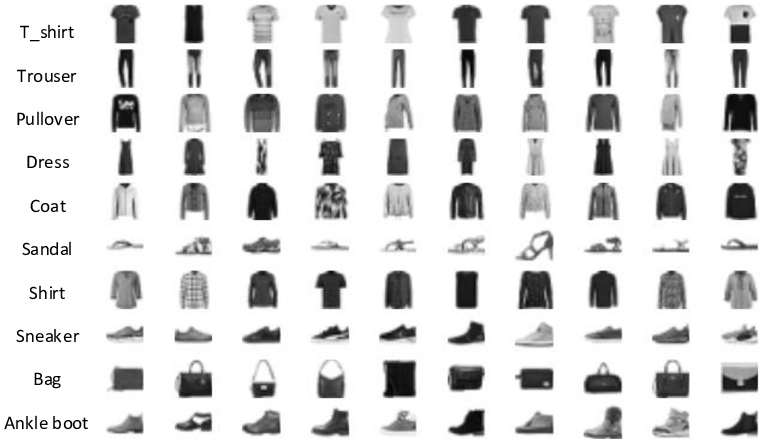

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# Data Preprocessing:

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score

# Models:

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# A model that I learned by myself: CatBoost + Plotly

from catboost import CatBoostClassifier
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

# offline (for plotly)

import plotly.offline as pyo

# Clustering:

from sklearn.cluster import KMeans

# PCA:

from sklearn.decomposition import PCA

# ICA:

from sklearn.decomposition import FastICA

# Scaling:

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cross Validation:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# training df:

df_train = pd.read_csv("C:\\Haim\\Anaconda\\fashion_mnist_train.csv") # csv pandas df

df_train.sample(n = 4, random_state = 8).sort_values(by = 'label')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
56059,2,0,0,0,0,0,2,0,0,0,...,5,4,0,45,147,144,4,0,0,0
32997,4,0,0,0,0,0,0,1,2,0,...,3,0,0,191,198,0,0,0,0,0
50681,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13395,8,0,0,0,0,0,0,0,0,0,...,211,214,208,199,197,208,212,193,42,0


In [3]:
# testing df: we will not train our model on this df, we will test out model on it at the end of the notebook

df_test = pd.read_csv("C:\\Haim\\Anaconda\\fashion-mnist_test.csv") # csv pandas df

df_test.sample(n = 4, random_state = 8).sort_values(by = 'label')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1197,1,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
6759,2,0,0,0,0,0,0,1,0,0,...,0,0,0,89,100,13,0,0,0,0
697,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
837,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see, we have the label - the type of cloth, and 0-255 value for each pixel in the frame.

In [4]:
df_train.shape # 60000 rows and 785 columns (784 pixels + label column)

(60000, 785)

In [5]:
df_test.shape # 10000 rows and 785 columns (784 pixels + label column) - test

(10000, 785)

In [6]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


##### As you can see, each label can be taken on its own. It is also possible to notice that in general, there are some differences between the labels.

In [7]:
df_train[df_train['label']==3].describe() # 3 = Dress

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,6000.0,6000.000000,6000.000000,6000.0000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3.0,0.002667,0.002667,0.0035,0.005833,0.129500,0.359500,0.920000,2.021167,5.126167,...,67.422000,36.052667,13.772333,4.007333,1.265667,0.417667,0.095500,0.031167,0.007833,0.011333
std,0.0,0.206559,0.206559,0.2164,0.230524,1.981342,5.620189,8.942423,14.114541,21.429500,...,64.078267,53.129916,34.930644,17.694937,9.936358,4.417179,2.276893,1.040853,0.470612,0.700681
min,3.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,56.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,115.000000,62.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.0,16.000000,16.000000,16.0000,16.000000,71.000000,202.000000,198.000000,216.000000,232.000000,...,255.000000,255.000000,255.000000,241.000000,189.000000,112.000000,100.000000,59.000000,35.000000,53.000000


In [8]:
df_train[df_train['label']==9].describe() # 9 = Ankle boot 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,6000.0,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,9.0,0.0,0.010000,0.010000,0.010000,0.010000,0.010167,0.010667,0.010667,0.012333,...,0.464500,1.017833,2.398833,4.616167,7.557000,8.332500,7.149667,5.402833,2.698333,0.205167
std,0.0,0.0,0.376285,0.376285,0.376285,0.376285,0.377386,0.378475,0.379355,0.384975,...,6.179922,10.100537,16.947555,24.181790,31.480501,33.038667,29.745163,25.483814,16.859272,3.132737
min,9.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.0,0.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,179.000000,221.000000,230.000000,252.000000,243.000000,255.000000,238.000000,225.000000,205.000000,92.000000


In [9]:
df_train.isnull().sum().sum() # the dataset has no NaN values

0

In [10]:
df_train.label.unique() # we have 0-9 labels: 10 labels

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [11]:
cor = df_train.corr() # it calculates the correation between each two features

##### Since the feature that interests us is the label, we would like to see only the correlation between each feature and the label.

In [12]:
cor_target = abs(cor["label"])

# selecting highly correlated features

relevant_features = cor_target[cor_target > 0.5] # shows only corr with 0.5 or higher value
relevant_features

label       1.000000
pixel11     0.507680
pixel12     0.569076
pixel17     0.500036
pixel18     0.537011
              ...   
pixel559    0.578456
pixel585    0.527442
pixel586    0.561620
pixel587    0.535309
pixel614    0.508677
Name: label, Length: 106, dtype: float64

In [92]:
# 105 features is nice(106 - label), but I would like to know about higher corr than 0.5

for i in range(51):
        print("Higher than",round(0.5 + i*0.01, 2), "correlation: # of Pixels:",len(cor_target[cor_target > (0.5 + i*0.01)])-1)
        if len(cor_target[cor_target > (0.5 + i*0.01)]) == 1:
            break

Higher than 0.5 correlation: # of Pixels: 105
Higher than 0.51 correlation: # of Pixels: 96
Higher than 0.52 correlation: # of Pixels: 92
Higher than 0.53 correlation: # of Pixels: 84
Higher than 0.54 correlation: # of Pixels: 73
Higher than 0.55 correlation: # of Pixels: 65
Higher than 0.56 correlation: # of Pixels: 63
Higher than 0.57 correlation: # of Pixels: 55
Higher than 0.58 correlation: # of Pixels: 47
Higher than 0.59 correlation: # of Pixels: 43
Higher than 0.6 correlation: # of Pixels: 36
Higher than 0.61 correlation: # of Pixels: 28
Higher than 0.62 correlation: # of Pixels: 19
Higher than 0.63 correlation: # of Pixels: 13
Higher than 0.64 correlation: # of Pixels: 10
Higher than 0.65 correlation: # of Pixels: 5
Higher than 0.66 correlation: # of Pixels: 3
Higher than 0.67 correlation: # of Pixels: 1
Higher than 0.68 correlation: # of Pixels: 0


##### In summary, it can be seen that there are around 36 pixels that have a significant effect on the label of each image (more than 0.6). We will consider using this value for the amount of pixels we will take from each image. On the other hand, it will be interesting to see if dimensionality reduction algorithms (PCA or ICA) will give us the same amount of features.

In [13]:
target = df_train['label'] # the feature we would like to predict, the label of picture
data = df_train.drop(['label'], axis = 1) # we will drop y from x, because we want to predict it

In [14]:
# we will split our testing dataset into data & target. We can't train this dataset. we will use it as a X_test & y_test

test_labels = df_test['label'] # the feature we would like to predict, the label of picture
test = df_test.drop(['label'], axis = 1) # we will drop y from x, because we want to predict it

##### There are 10 labels, it means that there are 10 different types of clothing to be classified:

* 0 - T-Shirt/Top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle Boot

In [15]:
# A function to show the labels
def num_to_name(label):
    labeled = label.copy()
    mapping = {0 :'T-Shirt/Top',
    1 :'Trouser',
    2 :'Pullover',
    3 :'Dress',
    4 :'Coat',
    5 :'Sandal',
    6 :'Shirt',
    7 :'Sneaker',
    8 :'Bag',
    9 :'Ankle Boot'}
    labeled = label.map(mapping)
    return labeled

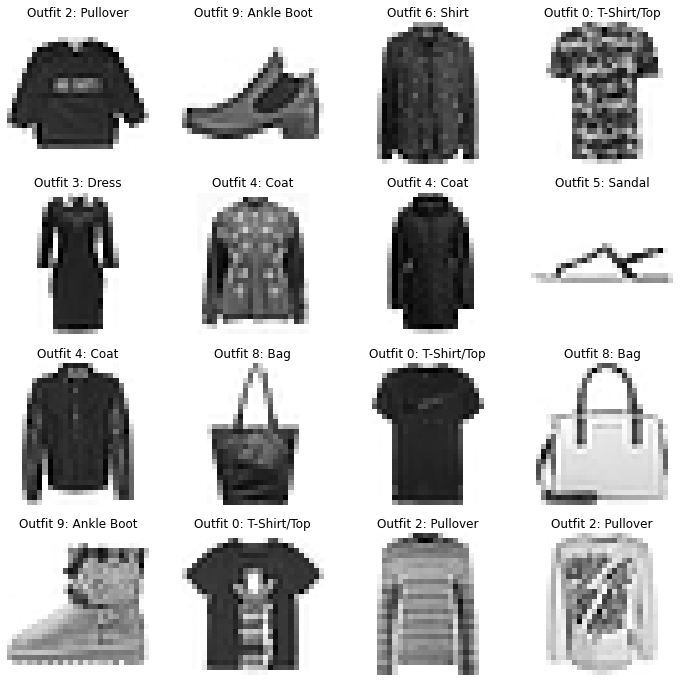

In [16]:
# exaple of pictures with their correct label

fig, axes = plt.subplots(4, 4, figsize = (12,12))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(data.values.reshape((data.shape[0], 28, 28))[i], cmap=plt.get_cmap('binary'))
    axes[i].set_title("Outfit " + str(target[i]) + ": "+ num_to_name(target)[i])
    axes[i].axis('off')
plt.show()

In [17]:
target.value_counts() # how much exapmles we have from each label

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

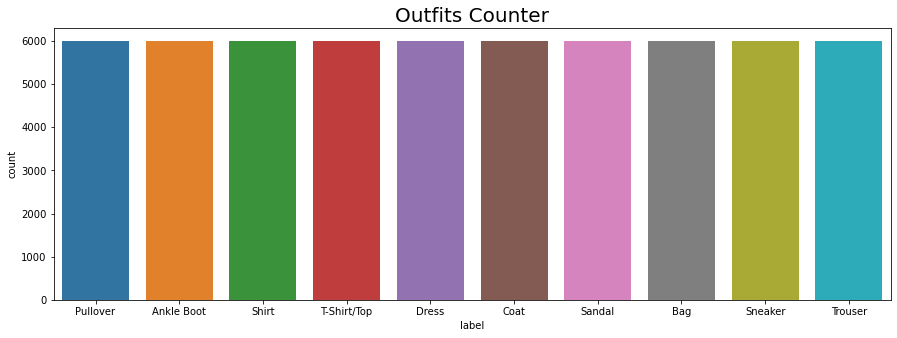

In [18]:
# a simple counter graph for it

plt.subplots(figsize = (15,5))
plt.title("Outfits Counter", size=20)
fig = sns.countplot(num_to_name(target))

##### The data is very balanced in terms of the amount of samples we have from each label. We will conclude unequivocally that a dummy classifier model will give us a 10% success rate for ten labels. This is a very low percentage that will also be very easy to pass.

## Data Processing

The things that are important to consider before start to work with the data:
- As we can see, when a pixel value is 0 (black pixel), it means that its an empty pixel. We would like to drop pixels which are empty in most of the pictures.
- We will consider choosing to use one of the following methods in order to make our model more compact: PCA and K-means. Note that in the PCA method we would like to use as few pixels as possible in order to label the item of clothing. When using the K-Means method, we want to use as few colors as possible in the classification process.
- We would like to understand which labels are more difficult to classify, and which are easier. We may consider using a more complex model in cases where the differences between two labels are the most minor and requires a maximum of data. On the other hand, when an item is easy to identify, less data is required to classify it.

### Training / Testing Split:

In [19]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.2, random_state=18)
X_test = test.copy() # since we already split test_df into data and labels, we cant do more actions on it

### Scaling: 

In [20]:
# important for infinty values cases

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

##### Since we have 256 pixels (0-255), we can divide them into 255 in order to achieve the desired range values (0-1).

In [21]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# Dimensionality Reduction

# PCA (Principal Component Analysis)

Principal Component Analysis (PCA) is a classical technique in statistical data analysis, feature extraction and data reduction, aiming at explaining observed signals as a linear combination of orthogonal principal components.

##### We would like to find our optimal n_components value 

In [22]:
pca = PCA() # all 784 features
pca.fit(X_train)

PCA()

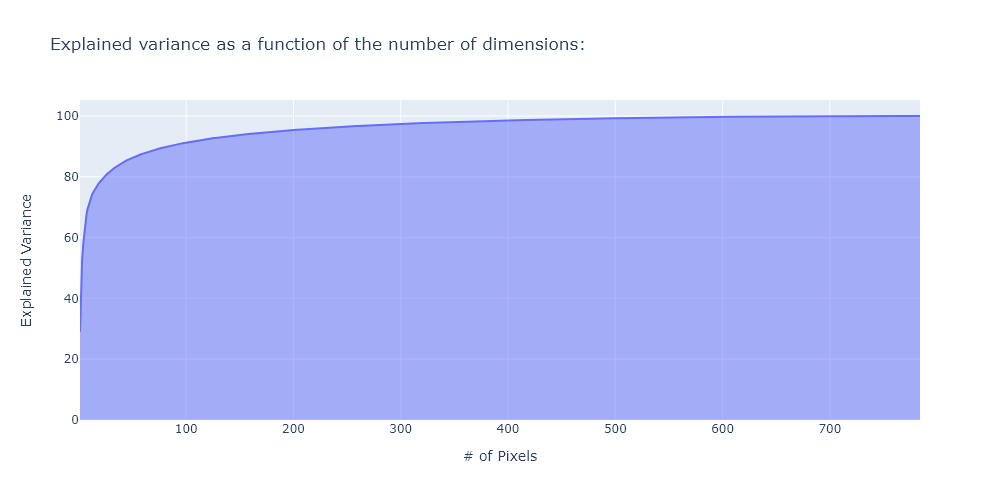

In [23]:
# A graph to present the conection between the num of features & the explained variance: 
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.area(
    title = "Explained variance as a function of the number of dimensions:",
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul * 100,
    labels={"x": "# of Pixels", "y": "Explained Variance"},
    width = 1000 ,
    height = 500
)

fig.show("png")

##### We can see that by taking only 24 features, we stay with 80% of explained variance. 

In [24]:
pca = PCA(n_components=0.80) # we can try using svd_solver="randomized"
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
pca.n_components_

24

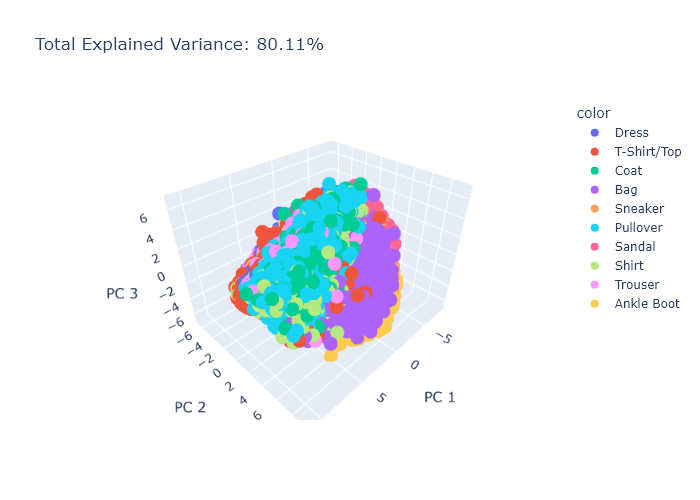

In [25]:
# A three-dimensional graph depicting the way our data is interpreted, plotly does it easily for us 
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    X_train_reduced, x=0, y=1, z=2, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show("png")

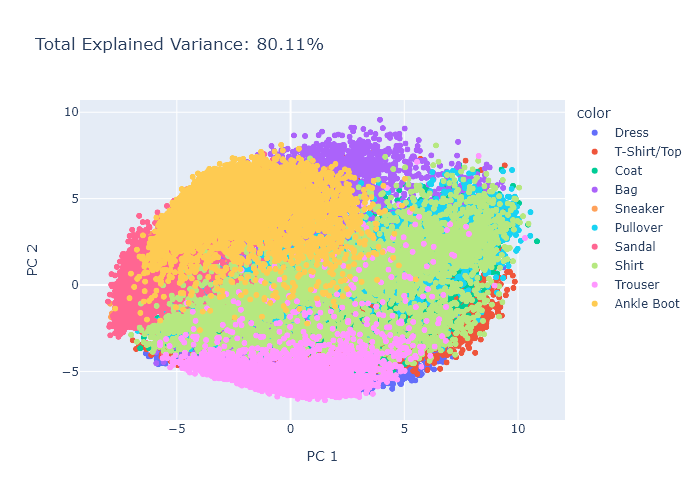

In [26]:
# 2D version: with x and y
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=0, y=1, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show("png")

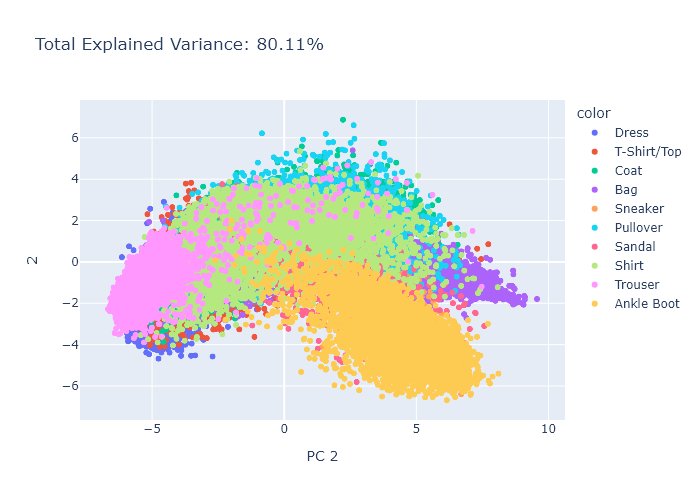

In [27]:
# 2D version: with y and z
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=1, y=2, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show("png")

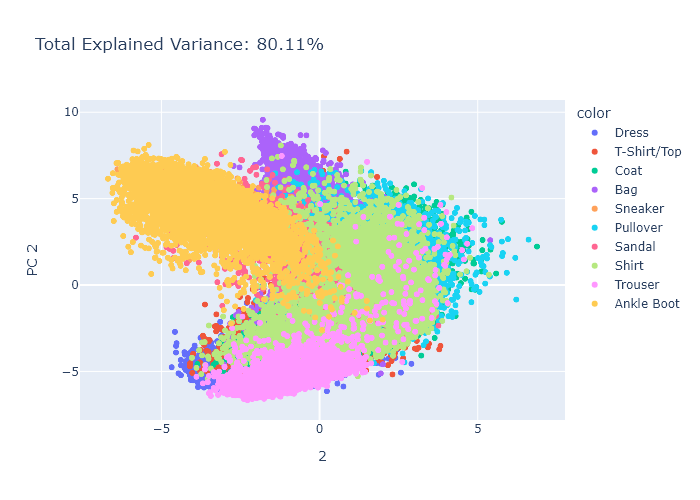

In [28]:
# 2D version: with z and y
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=2, y=1, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show("png")

##### We can present some of our new pics after the transfromation to 24 dimentionds:

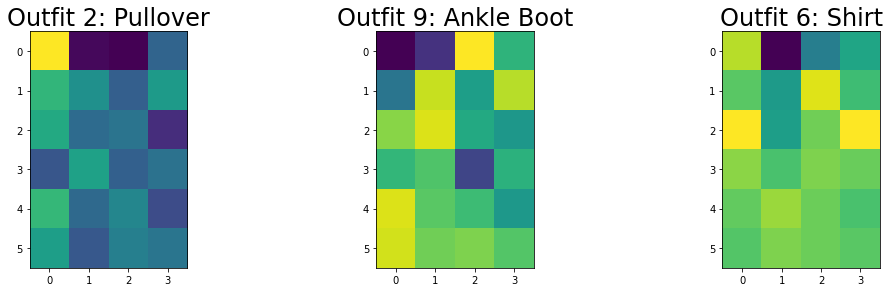

In [29]:
plt.figure(figsize=(30,20))

for i in range(3):
    plt.subplot(4,5,i+1)
    plt.title("Outfit " + str(y_train[i]) + ": "+ num_to_name(y_train)[i], size = 24)
    plt.imshow(X_train_reduced[i].reshape(6,4))

plt.show;

# ICA (Independent Component Analysis)

Independent Component Analysis (ICA) is a technique of array processing and data analysis, aiming at recovering unobserved signals or ‘sources’ from observed mixtures, exploiting only the assumption of mutual independence between the signals. The separation of the sources by ICA has great potential in applications such as the separation of sound signals (like voices mixed in simultaneous multiple records, for example), in telecommunication or in the treatment of medical signals. However, ICA is not yet often used by statisticians. While the goal in PCA is to find an orthogonal linear transformation that maximizes the variance of the variables, the goal of ICA is to find the linear transformation, which the basis vectors are statistically independent and non-Gaussian

For more info about how ICA is different from PCA: http://www2.hawaii.edu/~kyungim/papers/baek_cvprip02.pdf

##### I chose to use ICA instead of PCA because the pictures in this dataset are very neat (as opposed to a dataset of dogs vs cats). ICA algorithm is faster and I think that in this specific case, using a simpler algorithm will actually give better results, and more importantly, in less time. Also, we have already received from PCA's analysis the amount of pixels needed, so I will just put 24 pixels into the ICA algorithm.

In [30]:
ica = FastICA(n_components=24, random_state=18) # I took the results from PCA and applied them on ICA (24 pixels)
X_train_reduced = ica.fit_transform(X_train) # fit ica on train
X_val_reduced = ica.transform(X_val) # aplly ica on validation
X_train_reduced.shape

(48000, 24)

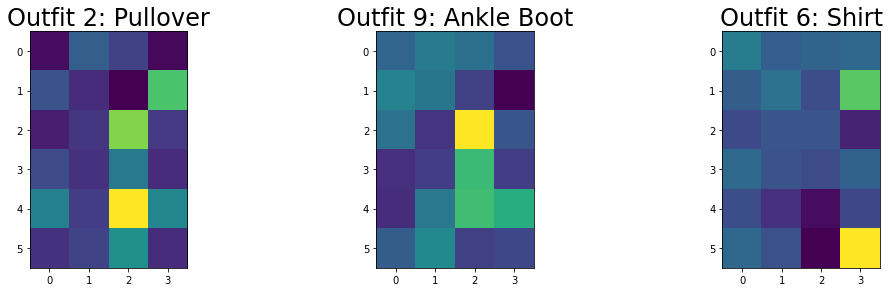

In [31]:
# we can see that ica uses a completely different way to change the pictures

plt.figure(figsize=(30,20))

for i in range(3):
    plt.subplot(4,5,i+1)
    plt.title("Outfit " + str(y_train[i]) + ": "+ num_to_name(y_train)[i], size = 24)
    plt.imshow(X_train_reduced[i].reshape(6,4))

plt.show;

##### After reducing the num of the features, we will convert X_train & X_validation to pandas data frames:

In [32]:
X_train = pd.DataFrame(X_train_reduced)
X_val = pd.DataFrame(X_val_reduced)

# Models

##### We will use some of the models we have learned trought this year to predict the type of the outfit. We would like to use the three best model to create a voting model.

## Naive Bayes

##### This model is extremly simple. We will use it as our dummy model. Dummy Classifier should do 10% of success in a multi class classification of 10 equal classes.

In [33]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes

GaussianNB()

In [34]:
y_pred = bayes.predict(X_val)
bayes_acc = accuracy_score(y_val, y_pred)
bayes_acc

0.7450833333333333

In [35]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1207
           1       0.83      0.92      0.87      1208
           2       0.70      0.68      0.69      1195
           3       0.73      0.75      0.74      1203
           4       0.67      0.68      0.67      1191
           5       0.85      0.62      0.71      1159
           6       0.54      0.37      0.44      1204
           7       0.66      0.89      0.76      1246
           8       0.84      0.90      0.87      1177
           9       0.90      0.83      0.86      1210

    accuracy                           0.75     12000
   macro avg       0.74      0.74      0.74     12000
weighted avg       0.74      0.75      0.74     12000



##### Due to Guessian Naive Bayes results, our model must be better than 74.5% of success on our validation test.  

## KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_pred = knn.predict(X_val)
knn_acc = accuracy_score(y_val, y_pred)
knn_acc

0.848

In [38]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1207
           1       0.98      0.98      0.98      1208
           2       0.73      0.78      0.76      1195
           3       0.89      0.86      0.87      1203
           4       0.77      0.74      0.76      1191
           5       0.94      0.88      0.91      1159
           6       0.65      0.57      0.61      1204
           7       0.88      0.93      0.91      1246
           8       0.97      0.93      0.95      1177
           9       0.92      0.94      0.93      1210

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



## Logistic Regression

In [39]:
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)
lr

LogisticRegression()

In [40]:
y_pred = lr.predict(X_val)
lr_acc = accuracy_score(y_val, y_pred)
lr_acc

0.7495

In [41]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1207
           1       0.97      0.92      0.94      1208
           2       0.67      0.65      0.66      1195
           3       0.77      0.83      0.80      1203
           4       0.61      0.79      0.69      1191
           5       0.64      0.70      0.67      1159
           6       0.64      0.14      0.23      1204
           7       0.77      0.81      0.79      1246
           8       0.85      0.91      0.88      1177
           9       0.83      0.94      0.88      1210

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.73     12000
weighted avg       0.75      0.75      0.73     12000



## CatBoost

##### An open-source software library developed by Yandex. It provides a Gradient Boosting framework which attempts to solve for Categorical features using a permutation driven alternative compared to the classical algorithm. For more information: https://catboost.ai/

In [42]:
cat = CatBoostClassifier(logging_level='Silent')
cat.fit(X_train, y_train)
cat

In [43]:
y_pred = cat.predict(X_val)
y_pred_cat = y_pred
cat_acc = accuracy_score(y_val, y_pred)
cat_acc

0.8735

In [44]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1207
           1       0.98      0.98      0.98      1208
           2       0.80      0.80      0.80      1195
           3       0.89      0.89      0.89      1203
           4       0.78      0.81      0.80      1191
           5       0.95      0.93      0.94      1159
           6       0.71      0.63      0.67      1204
           7       0.92      0.93      0.93      1246
           8       0.95      0.95      0.95      1177
           9       0.95      0.95      0.95      1210

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



## AdaBoost

In [45]:
rfc = RandomForestClassifier(n_estimators=10)
ada = AdaBoostClassifier(n_estimators=100,learning_rate= 0.1, base_estimator=rfc)
ada.fit(X_train, y_train)
ada

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10),
                   learning_rate=0.1, n_estimators=100)

In [46]:
y_pred = ada.predict(X_val)
ada_acc = accuracy_score(y_val, y_pred)
ada_acc

0.85675

In [47]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1207
           1       0.99      0.97      0.98      1208
           2       0.78      0.78      0.78      1195
           3       0.88      0.87      0.88      1203
           4       0.75      0.82      0.79      1191
           5       0.92      0.90      0.91      1159
           6       0.71      0.53      0.61      1204
           7       0.90      0.92      0.91      1246
           8       0.94      0.94      0.94      1177
           9       0.92      0.96      0.94      1210

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.85     12000
weighted avg       0.86      0.86      0.85     12000



## XGBoost

In [48]:
xgb = XGBClassifier(use_label_encoder =False)
xgb.fit(X_train, y_train)
xgb

[11:28:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [49]:
y_pred = xgb.predict(X_val)
xgb_acc = accuracy_score(y_val, y_pred)
xgb_acc

0.866

In [50]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1207
           1       0.98      0.97      0.98      1208
           2       0.77      0.79      0.78      1195
           3       0.89      0.88      0.88      1203
           4       0.78      0.80      0.79      1191
           5       0.95      0.93      0.94      1159
           6       0.67      0.61      0.64      1204
           7       0.92      0.94      0.93      1246
           8       0.94      0.95      0.95      1177
           9       0.95      0.95      0.95      1210

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



## Random Forest

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf

RandomForestClassifier()

In [52]:
y_pred = rf.predict(X_val)
rf_acc = accuracy_score(y_val, y_pred)
rf_acc

0.8553333333333333

In [53]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81      1207
           1       0.98      0.97      0.98      1208
           2       0.76      0.80      0.78      1195
           3       0.87      0.87      0.87      1203
           4       0.77      0.80      0.78      1191
           5       0.91      0.92      0.91      1159
           6       0.69      0.57      0.62      1204
           7       0.91      0.92      0.91      1246
           8       0.93      0.93      0.93      1177
           9       0.94      0.94      0.94      1210

    accuracy                           0.86     12000
   macro avg       0.85      0.86      0.85     12000
weighted avg       0.85      0.86      0.85     12000



##### Now we would like to take our top 3 models and mix  them into a voting model:

## Voting

Soft Voting/Majority Rule classifier for unfitted estimators.

### Hard Voting:

In [54]:
clf1 = xgb
clf2 = knn
clf3 = rf
clf4 = cat

In [55]:
hv = VotingClassifier(estimators=[
        ('xgb', clf1), ('knn', clf2), ('rf', clf3)], voting='hard')
hv.fit(X_train, y_train)
hv

[11:30:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1,
                                            objective='multi:softprob',
                             

In [56]:
y_pred = hv.predict(X_val)
hv_acc = accuracy_score(y_val, y_pred)
hv_acc

0.8670833333333333

In [57]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1207
           1       0.98      0.97      0.98      1208
           2       0.76      0.81      0.79      1195
           3       0.89      0.88      0.88      1203
           4       0.80      0.80      0.80      1191
           5       0.94      0.92      0.93      1159
           6       0.72      0.58      0.64      1204
           7       0.91      0.93      0.92      1246
           8       0.95      0.94      0.95      1177
           9       0.94      0.95      0.95      1210

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



### Soft Voting:

In [58]:
sv = VotingClassifier(estimators=[
        ('xgb', clf1), ('cat', clf4), ('rf', clf3)], voting='soft', weights=[1,3,1])
sv.fit(X_train, y_train)
sv

[11:32:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1,
                                            objective='multi:softprob',
                             

In [59]:
y_pred = sv.predict(X_val)
y_pred_sv = y_pred.copy()
sv_acc = accuracy_score(y_val, y_pred)
sv_acc

0.8748333333333334

In [60]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1207
           1       0.99      0.98      0.98      1208
           2       0.80      0.81      0.80      1195
           3       0.89      0.89      0.89      1203
           4       0.79      0.82      0.80      1191
           5       0.95      0.93      0.94      1159
           6       0.70      0.62      0.66      1204
           7       0.92      0.94      0.93      1246
           8       0.95      0.95      0.95      1177
           9       0.95      0.95      0.95      1210

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



##### It is clear that our attempt to unify the models was unsuccessful. We will continue with CatBoost

### Conclusion:

In [61]:
acc_list = {'Model':  ['Naive Bayes', 'KNN','Logistic Regression','CatBoost', 'AdaBoost', 'XGBoost','Random Forest','Hard Voting', 'Soft Voting'],
        'Accuracy': [bayes_acc,knn_acc,lr_acc,cat_acc,ada_acc,xgb_acc,rf_acc,hv_acc,sv_acc],
        }

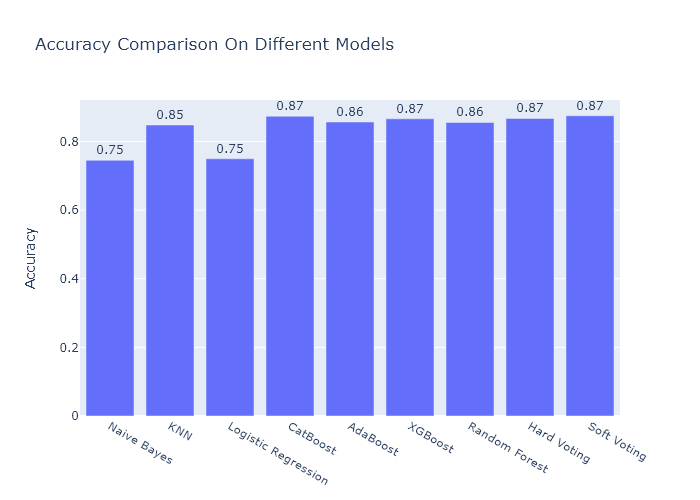

In [62]:
fig = go.Figure(data=[
    go.Bar(name='train set', x=acc_list['Model'], y=acc_list['Accuracy'],text=np.round(acc_list['Accuracy'],2),textposition='outside'),
])
fig.update_layout(barmode='group',title_text='Accuracy Comparison On Different Models',yaxis=dict(
        title='Accuracy'))
fig.show("png")

# The Best Model is CatBoost, with  87.5% of success, by using only 24 pixels.

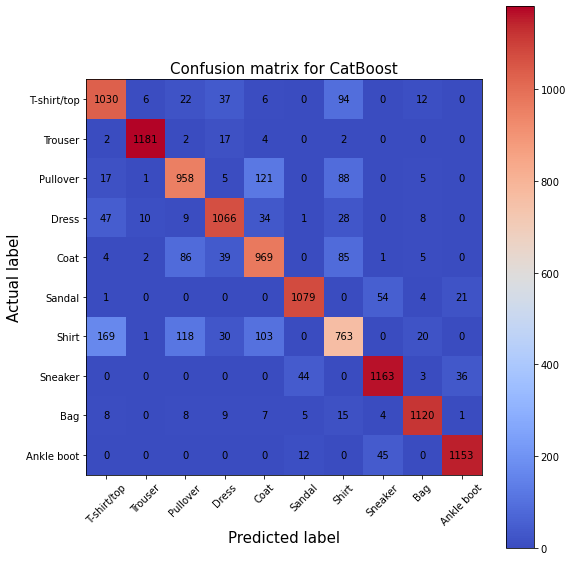

In [63]:
cm = confusion_matrix(y_val, y_pred_cat)
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.coolwarm)
plt.title('Confusion matrix for CatBoost', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], rotation=45, size = 10)
plt.yticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

# Cross Validation by Pipeline & Grid Search

In [64]:
# we will concat our X,y train for cross validation for our best model - catboost

X = pd.concat([X_train, X_val], axis = 0)
y = pd.concat([y_train, y_val], axis = 0)

# now the dataset is united again, we can split it 5 time for cv score

pipe = Pipeline(steps=[('CatBoost', cat)])
search = GridSearchCV(pipe, param_grid={'CatBoost__iterations':[500, 750, 1000]}, cv=5) # 5 cv on iterations
search.fit(X, y) # we will apply cv on our whole data because we would like our model to see more examples
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.871):
{'CatBoost__iterations': 1000}


# Testing our best model on test df:

After making our model from the train dataset, we would like to figure out if our model will succeed with new data that it never seen before. 

In [65]:
X_test = ica.transform(X_test) # aplly ica on X_test
y_test = test_labels.copy()

In [66]:
y_pred = search.predict(X_test) # search = catboost after cv

In [67]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.79      0.80      1000
           3       0.89      0.90      0.90      1000
           4       0.81      0.84      0.82      1000
           5       0.94      0.92      0.93      1000
           6       0.70      0.67      0.68      1000
           7       0.91      0.91      0.91      1000
           8       0.96      0.97      0.97      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [68]:
accuracy_score(y_test, y_pred)

0.8759

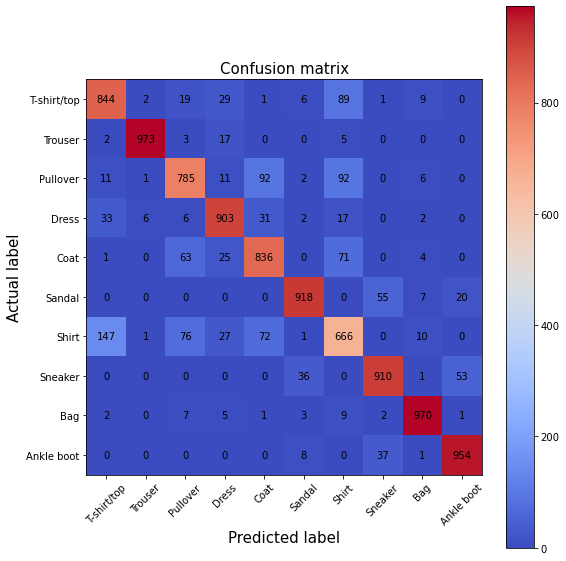

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.coolwarm)
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], rotation=45, size = 10)
plt.yticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

## To sum up, our CatBoost Model did 87.6% of success on the testing dataset. By using ICA, we used 24 out of 784 pixels to achieve this result.